In [749]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import measure, color, io
from google.colab.patches import cv2_imshow as sh
from skimage import measure, color, io

In [ ]:
cv2.__version__

'4.6.0'

In [1113]:
# Image
img_no = 24

In [1114]:
# # Parameters
# itr_btp = 

(960, 1280)

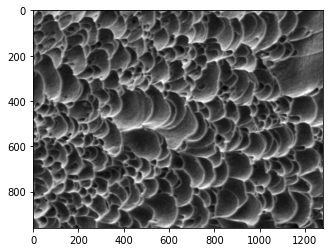

In [1177]:
img = cv2.imread(f'/content/drive/MyDrive/BTP/Result- Part-2/Dataset/Dataset_Part_2/image{img_no}.png', 0)
plt.imshow(img, cmap='gray')
# lab = cv2.imread('/content/drive/MyDrive/BTP/Results- Part-1/dataset/mask-duplicate/label20.png', cv2.IMREAD_COLOR)
# img[(lab != [255, 0, 0])[:, : ,0]] = 255
img.shape

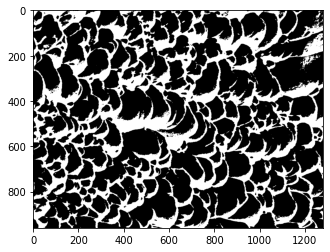

In [1153]:
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

In [1154]:
kernel = np.ones((1, 1), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=50)
opening = (np.logical_not(opening)).astype(np.uint8)

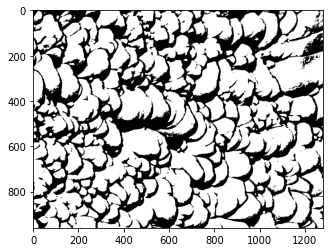

In [1155]:
plt.imshow(opening, cmap='gray')

In [1156]:

sure_bg = cv2.dilate(opening, kernel, iterations=50)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 3)
ret2, sure_fg = cv2.threshold(dist_transform, 0.30*dist_transform.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8)
unknown = cv2.subtract(sure_bg, sure_fg)

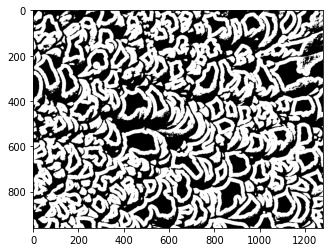

In [1157]:
plt.imshow(unknown, cmap='gray')

In [1158]:
ret3, markers = cv2.connectedComponents(sure_fg)
markers = markers+10
markers = np.uint8(markers)
markers[unknown==1] = 0

In [1159]:
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(img, np.int32(markers))
img2 = color.label2rgb(markers, bg_label=10)

<Figure size 432x576 with 0 Axes>

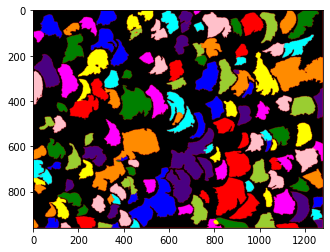

<Figure size 432x576 with 0 Axes>

In [1160]:
plt.imshow(img2)
plt.figure(figsize=(6, 8))

In [1161]:
skeleton_img = np.zeros(img.shape, dtype=np.uint8)
skeleton_img[markers == -1] = [255, 255, 255]

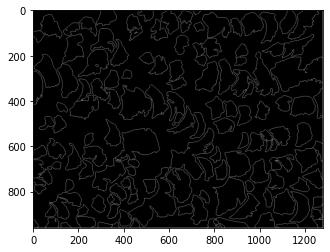

<Figure size 432x576 with 0 Axes>

In [1162]:
plt.imshow(skeleton_img)
plt.figure(figsize=(6, 8))
plt.show()

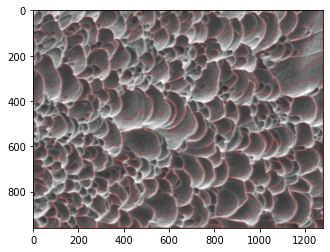

<Figure size 432x576 with 0 Axes>

In [1163]:
img[markers == -1] = [255, 0, 0]
plt.imshow(img)
plt.figure(figsize=(6, 8))
plt.show()

In [1164]:
props = measure.regionprops_table(markers, intensity_image=img, properties=['area', 'equivalent_diameter', 'mean_intensity', 'orientation', 'perimeter', 'max_intensity' ,'min_intensity', 'major_axis_length', 'minor_axis_length'])

import pandas as pd
props['concavity'] = props['perimeter']/props['area']
df = pd.DataFrame(props)
#df = df.sort_values(by = 'area', ascending = False)
#df_filtered = df[df['perimeter'] != 0]
df_filtered = df[df['perimeter']/df['area'] < 0.3]
df_filtered = df_filtered[df_filtered['area'] < 8500]
#df_filtered.sort_values(by = 'area', ascending = False, inplace=True)
print(df_filtered)

     area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
1    4145            72.646940         84.935103         84.935103   
2    1987            50.298379         90.348264         90.348264   
3     415            22.986831         99.346988         99.346988   
4    7445            97.361535         84.954466         84.954466   
5    2251            53.535616         82.650822         82.650822   
..    ...                  ...               ...               ...   
147   956            34.888637         78.298117         78.298117   
148   743            30.757389         83.839838         83.839838   
149  1184            38.826738         85.410473         85.410473   
150  1584            44.908924         75.745581         75.745581   
151   538            26.172560         87.806691         87.806691   

     mean_intensity-2  orientation   perimeter  max_intensity-0  \
1           84.935103    -1.130648  311.557395              119   
2           90.348264    

In [1165]:
props['concavity'] = props['perimeter']/props['area']

In [1166]:
df_area = df[df['area'] < 15000]
conc_area = np.asarray(df_area['area'][1:])

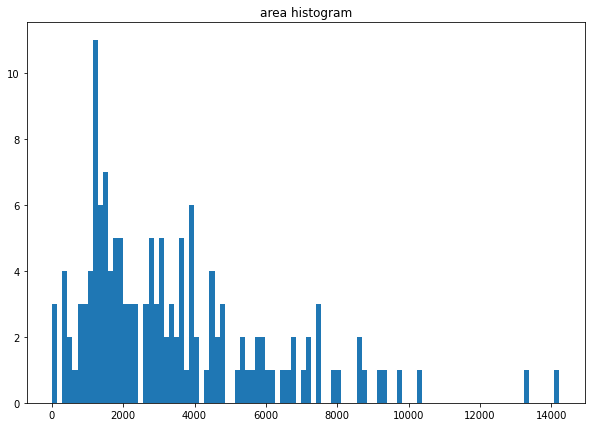

In [1167]:
fig = plt.figure(figsize =(10, 7))

plt.hist(conc_area, bins = 100)
plt.title("area histogram")
plt.show()

In [1168]:
conc = np.asarray(props['concavity'][1:])

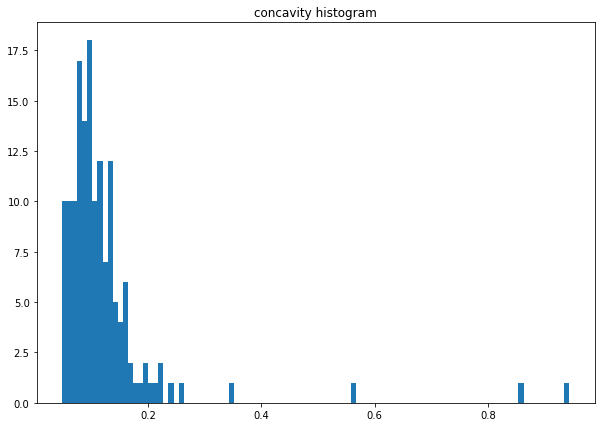

In [1169]:
fig = plt.figure(figsize =(10, 7))
 
plt.hist(conc, bins = 100)
plt.title("concavity histogram")
plt.show()

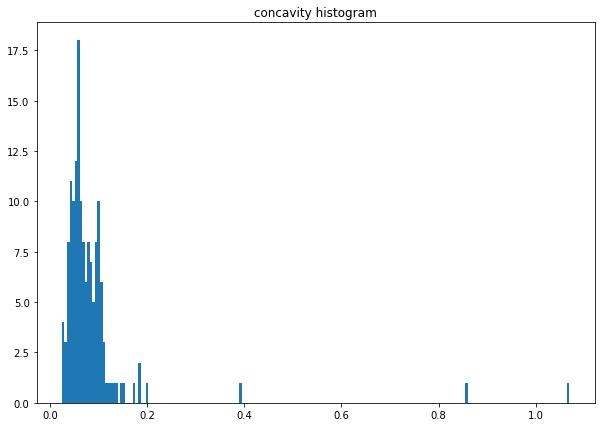

In [1170]:
fig = plt.figure(figsize =(10, 7))
 
plt.hist(4/props['equivalent_diameter'][1:], bins = 200)
plt.title("concavity histogram")
plt.show()

In [1171]:
param1 = df_filtered['major_axis_length']/df_filtered['equivalent_diameter']

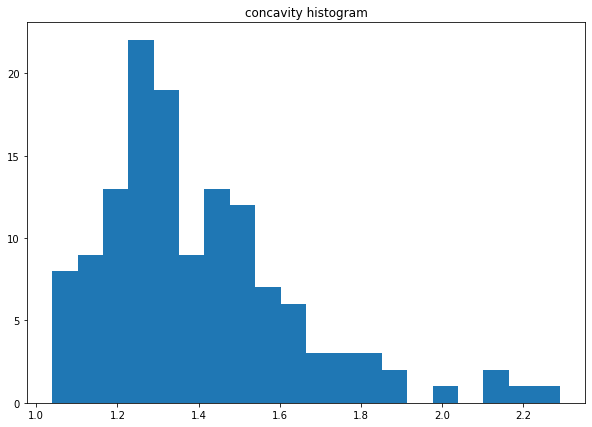

In [1172]:
fig = plt.figure(figsize =(10, 7))
 
plt.hist(param1, bins =20)
plt.title("concavity histogram")
plt.show()

In [1173]:
coords = np.where(markers == 10)

In [1174]:
# regions = np.unique(markers)[2:]
# for region in region:
#     eq_diameter = 
#     reg_coords = 

In [1175]:
# fig = plt.figure(figsize =(10, 7))
 
# plt.hist(aspect_ratio[:-3], bins = 25)
# plt.title("concavity histogram")
# plt.show()

In [1176]:
df_filtered.to_excel(f'/content/drive/MyDrive/BTP/Result- Part-2/Dimples_Statistics/image{img_no}.xls', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.
